In [1]:
import torch as tr
import numpy as np
from matplotlib import pyplot as plt
#
import sys

In [2]:
print('python version:',sys.version)
print('torch version:',tr.__version__)

python version: 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
torch version: 1.9.0


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Fri_Dec_17_18:28:54_Pacific_Standard_Time_2021
Cuda compilation tools, release 11.6, V11.6.55
Build cuda_11.6.r11.6/compiler.30794723_0


In [4]:
# Number of samples
Ns = 100 # 5 10 20
# Number of hidden neurons
Nn = 20 # 5 7 10
# EPOCH
EPOCH = 20000

In [5]:
def y_func(x):
    x = tr.transpose(x,0,1)
    aux = np.sin(np.pi*x[0])*np.sin(np.pi*x[1])
    aux = tr.reshape(aux,(-1,1))
    return aux

**ANN definition**

In [6]:
# Fixed initial weights
tr.manual_seed(42)
# ANN definition
ANN = tr.nn.Sequential(
    tr.nn.Linear(2,Nn),
    tr.nn.Sigmoid(),
    #tr.nn.Linear(Nn,Nn),
    #tr.nn.Sigmoid(),
    tr.nn.Linear(Nn,1)
)
# See initial weights and ANN structure
ANN.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230]])),
             ('0.bias',
              tensor([ 0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265,
             

**Training set**

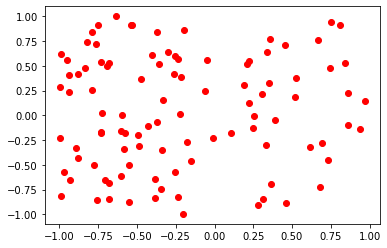

In [7]:
X_train = 2*tr.rand(Ns,2) - 1.
Y_train = y_func(X_train)
for i in range(Ns):
    plt.plot(X_train[i][0],X_train[i][1],'ro')
#plt.xlim(0,1)

In [8]:
optimizer = tr.optim.Adam(ANN.parameters(), lr=3e-3)

In [9]:
for epoch in range(EPOCH):
    y_hat = ANN(X_train)
    loss = tr.mean(tr.pow(y_hat - Y_train,2))
    #
    optimizer.zero_grad()
    #
    loss.backward()
    #
    optimizer.step()
    #
    if epoch % 1000 == 0:
        print('epoch:', epoch, 'loss:', loss.item())

epoch: 0 loss: 0.4108019769191742
epoch: 1000 loss: 0.0619441494345665
epoch: 2000 loss: 0.00891345925629139
epoch: 3000 loss: 0.005644248798489571
epoch: 4000 loss: 0.002422359539195895
epoch: 5000 loss: 0.0006372745265252888
epoch: 6000 loss: 0.0004489939601626247
epoch: 7000 loss: 0.0003742951957974583
epoch: 8000 loss: 0.00032170143094845116
epoch: 9000 loss: 0.0002585056936368346
epoch: 10000 loss: 0.0001808652450563386
epoch: 11000 loss: 0.00010168791050091386
epoch: 12000 loss: 5.5300606618402526e-05
epoch: 13000 loss: 3.586425373214297e-05
epoch: 14000 loss: 3.5984510759590194e-05
epoch: 15000 loss: 2.0706609575427137e-05
epoch: 16000 loss: 1.6517973563168198e-05
epoch: 17000 loss: 1.3556755220633931e-05
epoch: 18000 loss: 1.1396083209547214e-05
epoch: 19000 loss: 4.130277011427097e-05


In [10]:
Nt = 2000
X_test = 2*tr.rand(Nt,2) - 1.
Y_test = y_func(X_test)
Y_hat_test = ANN(X_test)

In [11]:
X_plot = tr.zeros(Nt,1)
Y_plot = tr.zeros(Nt,1)
for i in range(Nt):
    X_plot[i] = X_test[i][0]
    Y_plot[i] = X_test[i][1]

In [12]:
#%matplotlib

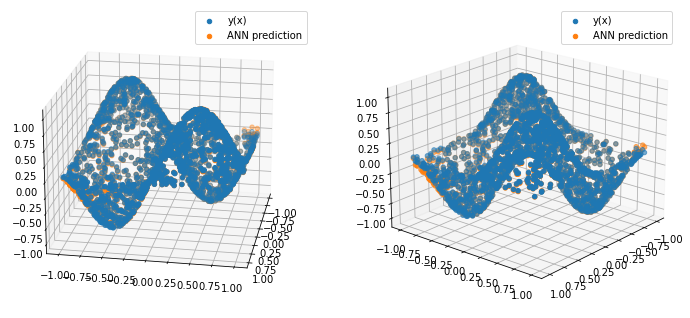

In [13]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter3D(X_plot, Y_plot, Y_test, cmap='binary', label='y(x)')
ax1.scatter3D(X_plot, Y_plot, Y_hat_test.detach().numpy(), cmap='binary', label='ANN prediction')
plt.legend()
ax1.view_init(elev=20., azim=10)
#
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter3D(X_plot, Y_plot, Y_test, cmap='binary', label='y(x)')
ax2.scatter3D(X_plot, Y_plot, Y_hat_test.detach().numpy(), cmap='binary', label='ANN prediction')
plt.legend()
ax2.view_init(elev=20., azim=40)
#
plt.show()